## Simulated Annealing on the Traveling Salesman problem##

 States: A full path represented as a list for the order of cities to travel. For example, [0,1,0] says "Go from city 0 to city 1 to city 0".

In [63]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

def SA_TS(dist_mat, T, start_city, mean, sigma):

    # Total distance for current path
    def objective_function(dist_mat, state):
        cost = 0
        for i in range(len(state) - 2):
            cost += dist_mat[state[i], state[i+1]]
        cost += dist_mat[state[-1],state[-2]]
        return cost
    
    def switch_two_cities(state):
        a = random.randint(1, len(state)-2)
        b = random.randint(1, len(state)-2)
        while b == a:
            b = random.randint(1, len(state)-2)
        state[a], state[b] = state[b], state[a]
        return state
               
    # Initial path: 0 -> 1, 1 -> 2, ... N-1 -> N
    initial = [i for i in range(len(dist_mat))]
    initial.append(start_city)
    distance_array = []
    
    path = initial 
    current_distance = objective_function(dist_mat, path)
    best_distance = current_distance
    best_path = initial
    
    for t in range(T,1,-1):
        
        distance_array.append(current_distance)
        new_path = switch_two_cities(path)
        
        new_distance = objective_function(dist_mat, new_path)
        E = current_distance - new_distance
                
        if new_distance < best_distance:
            best_distance = new_distance
            best_path = new_path
        
        # new path is shorter
        if E > 0:
            current_distance = new_distance
            path = new_path
            
        else:
            
            temp = (t+1)/T        
            Z = (E-mean)/sigma
            p = np.exp(Z/temp)

            if np.random.binomial(1, p) == 1:
                current_distance = new_distance
                path = new_path
        
    plt.plot(distance_array)
    plt.title('Search path (by objective function)')
    plt.ylabel('Path distance')
    plt.xlabel('Temperature (iteration)')
    plt.show()
    
    return best_path, best_distance

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12880.0,10650.0,9590.0,14960.0,11370.0,3060.0,1960.0,1150.0,2410.0,2850.0,17620.0,6320.0,6830.0
1,11830.0,4490.0,8980.0,12040.0,5650.0,2060.0,12650.0,15610.0,1380.0,1050.0,2230.0,670.0,12900.0
2,11530.0,8840.0,2880.0,3990.0,14140.0,13940.0,1870.0,6180.0,7380.0,10890.0,7840.0,11440.0,14030.0
3,7370.0,1050.0,7260.0,3130.0,2360.0,3990.0,10720.0,4050.0,7050.0,13160.0,10280.0,5100.0,5140.0
4,19160.0,730.0,6020.0,4240.0,8090.0,9510.0,14540.0,8540.0,1850.0,20560.0,23710.0,5680.0,11670.0
5,2700.0,4170.0,6830.0,13180.0,6170.0,25010.0,7600.0,670.0,10260.0,9850.0,2410.0,12830.0,8740.0
6,9400.0,300.0,160.0,5420.0,9380.0,7950.0,17190.0,12860.0,1090.0,6050.0,17660.0,8120.0,1590.0
7,19890.0,100.0,3420.0,13930.0,11910.0,5700.0,6990.0,8540.0,11240.0,5120.0,3010.0,26810.0,20230.0
8,1430.0,19730.0,5820.0,7680.0,7120.0,1210.0,18760.0,9160.0,7010.0,2860.0,960.0,6290.0,1990.0
9,5310.0,6600.0,7090.0,21640.0,1210.0,6730.0,2110.0,2510.0,8360.0,3230.0,5870.0,5750.0,20300.0


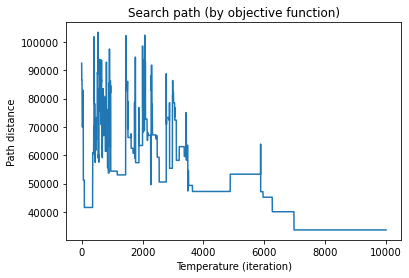

([0, 10, 6, 9, 3, 2, 4, 1, 12, 11, 5, 8, 7, 0], 33630.0)

In [64]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))

    for row in range(n):
        for col in range(n):
            distance = 0
            while distance <= 0:
                distance = np.random.normal(mean, sigma)
                distance_matrix[row][col] = round(distance,-1)
    return distance_matrix

T = 10000
mean = 100
sigma = 10000
distance_matrix = pd.DataFrame(write_distance_matrix(13, mean, sigma))
display(distance_matrix)

SA_TS(distance_matrix.to_numpy(), T, start_city = 0, mean = sigma, sigma = sigma)